In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
from math import floor,ceil
import matplotlib.dates as mdates
import datetime

In [21]:
df = pd.read_csv('./Data/Storico/clean_dataset.csv', index_col= 0)
#df.head()

,dep_day,arr_city_name,distance,arr_lat,arr_long,seatsleft,seats,fullseats,recommended_price,duration,provincia,regione,country_code
0,2017-01-01,ancona,425.0,43.615830,13.518915,1,1,0,24,18000,Ancona,Marche,IT
1,2017-01-01,aosta,179.0,45.735120,7.324020,2,3,13,10,9000,Aosta,Valle d'Aosta,IT
2,2017-01-01,arcore,37.0,45.626925,9.326543,3,3,0,1,3000,Monza-Brianza,Lombardia,IT
3,2017-01-01,ascoli piceno,529.0,42.864093,13.724874,1,2,1,29,21600,Ascoli Piceno,Marche,IT
4,2017-01-01,barzio,66.0,45.943638,9.465662,3,3,0,3,5400,Lecco,Lombardia,IT


In [22]:
ita = df[df['country_code'] == 'IT']

In [81]:
print set(ita['provincia'])

set(['Siracusa', 'Bologna', 'Grosseto', 'Torino', 'Caserta', 'La Spezia', 'Ancona', 'Pavia', 'Modena', 'Lodi', 'Novara', 'Avellino', 'Verona', 'Rovigo', 'Catania', 'Treviso', 'Livorno', 'Bergamo', 'Bolzano', 'Napoli', 'Campobasso', 'Fermo', 'Roma', 'Lucca', 'Brescia', 'Piacenza', 'Alessandria', 'Forli-Cesena', 'Pescara', 'Vercelli', 'Genova', 'Latina', 'Trieste', 'Aosta', 'Teramo', 'Udine', 'Verbano-Cusio-Ossola', 'Reggio Emilia', 'Frosinone', 'Taranto', 'Catanzaro', 'Undefined', 'Belluno', 'Pordenone', 'Viterbo', 'Gorizia', 'Ferrara', 'Chieti', 'Crotone', 'Foggia', 'Perugia', 'Bari', 'Benevento', 'Massa-Carrara', 'Pisa', 'Firenze', 'Salerno', 'Lecco', 'Lecce', 'Pistoia', 'Como', 'Barletta-Andria-Trani', 'Ragusa', 'Macerata', 'Imperia', 'Palermo', 'Matera', 'Mantova', "L'Aquila", 'Milano', 'Rieti', 'Pesaro e Urbino', 'Potenza', 'Brindisi', 'Siena', 'Reggio Calabria', 'Ascoli Piceno', 'Asti', 'Ravenna', 'Vicenza', 'Savona', 'Biella', 'Rimini', 'Prato', 'Cuneo', 'Cosenza', 'Sondrio', 'Pa

In [23]:
# Define a dictionary with the functions to apply for a given column:
f = {'fullseats': 'sum', 'seatsleft': 'sum', 'distance':'mean','arr_lat':'mean',
     'arr_long':'mean','recommended_price':'mean'}

prov = ita.groupby(['regione','provincia','dep_day']).agg(f)

prov.head()

distance  seatsleft  recommended_price  \
regione provincia dep_day                                              
Abruzzo Chieti    2017-01-09     589.0          2               32.0   
                  2017-01-17     591.0          2               32.0   
                  2017-01-27     590.0          5               32.0   
                  2017-02-01     591.0          3               32.0   
                  2017-02-05     651.0          2               35.0   

                                arr_lat  fullseats   arr_long  
regione provincia dep_day                                      
Abruzzo Chieti    2017-01-09  42.347886          0  14.163585  
                  2017-01-17  42.347886          0  14.163585  
                  2017-01-27  42.366424          1  14.154416  
                  2017-02-01  42.347882          0  14.163603  
                  2017-02-05  42.104559          0  14.705871

In [25]:
index = sorted(set(prov.index.get_level_values('provincia')))
cols = pd.date_range(start = datetime.date(2017, 1, 1), end = datetime.date(2017, 3, 31), freq='D')

In [26]:
pro_data = pd.DataFrame(index=index, columns=cols)
pro_data = pro_data.fillna(0) # with 0s rather than NaNs

In [27]:
for ind, row in prov.iterrows():
    pro = row.name[1]
    dat = row.name[2]
    
    value = int(row['seatsleft'] + row['fullseats'])
    pro_data.set_value(pro_data.index == pro, dat, value)

In [28]:
pro_data.head()

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-03-22 00:00:00,2017-03-23 00:00:00,2017-03-24 00:00:00,2017-03-25 00:00:00,2017-03-26 00:00:00,2017-03-27 00:00:00,2017-03-28 00:00:00,2017-03-29 00:00:00,2017-03-30 00:00:00,2017-03-31 00:00:00
Alessandria,0,0,3,6,15,18,3,14,8,8,...,3,5,11,3,0,10,4,7,12,0
Ancona,6,19,0,15,24,14,13,29,14,8,...,4,12,47,2,13,7,3,3,8,0
Aosta,17,15,2,10,25,44,15,6,0,3,...,0,7,17,26,0,0,11,3,9,0
Arezzo,0,2,0,3,0,0,0,3,2,3,...,0,0,8,2,4,3,0,0,0,0
Ascoli Piceno,2,0,3,0,6,3,0,0,0,2,...,0,5,0,0,0,6,4,0,9,0


In [36]:
cols = pro_data.columns.tolist()
print cols
x = pd.to_datetime(cols)

[Timestamp('2017-01-01 00:00:00', freq='D'), Timestamp('2017-01-02 00:00:00', freq='D'), Timestamp('2017-01-03 00:00:00', freq='D'), Timestamp('2017-01-04 00:00:00', freq='D'), Timestamp('2017-01-05 00:00:00', freq='D'), Timestamp('2017-01-06 00:00:00', freq='D'), Timestamp('2017-01-07 00:00:00', freq='D'), Timestamp('2017-01-08 00:00:00', freq='D'), Timestamp('2017-01-09 00:00:00', freq='D'), Timestamp('2017-01-10 00:00:00', freq='D'), Timestamp('2017-01-11 00:00:00', freq='D'), Timestamp('2017-01-12 00:00:00', freq='D'), Timestamp('2017-01-13 00:00:00', freq='D'), Timestamp('2017-01-14 00:00:00', freq='D'), Timestamp('2017-01-15 00:00:00', freq='D'), Timestamp('2017-01-16 00:00:00', freq='D'), Timestamp('2017-01-17 00:00:00', freq='D'), Timestamp('2017-01-18 00:00:00', freq='D'), Timestamp('2017-01-19 00:00:00', freq='D'), Timestamp('2017-01-20 00:00:00', freq='D'), Timestamp('2017-01-21 00:00:00', freq='D'), Timestamp('2017-01-22 00:00:00', freq='D'), Timestamp('2017-01-23 00:00:00'

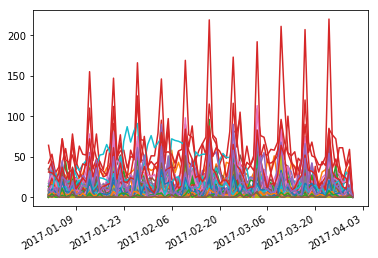

In [46]:
# plot di tutte le province
from matplotlib.ticker import MaxNLocator
for ind,row in pro_data.iterrows():
    y = pro_data.loc[ind].values
    plt.gca().plot_date(x, y, '-')
    plt.gcf().autofmt_xdate()
    #plt.gca().set_xlim([datetime.date(2017, 1, 1), datetime.date(2017, 3, 31)])
    #plt.gca().set_ylim([0, 7])
    #plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

In [70]:
# plot dei comuni entro la stessa provincia
ita.head()

nome_prov = 'Brescia'

single_prov= ita[ita['provincia'] == nome_prov]
print set(single_prov['arr_city_name'])


set(['gardone val trompia', 'limone sul garda', 'breno', 'darfo boario terme', 'roncadelle', 'borno', 'concesio', 'sal\xc3\xb2', 'montichiari', 'cividate camuno', 'darfo', 'ospitaletto', 'borgo san giacomo', 'desenzano del garda', 'iseo', 'rovato', 'molinetto', 'villa carcina', 'capriolo', 'ponte caffaro', 'paderno franciacorta', 'castenedolo', 'passirano', 'edolo', 'lonato', 'angolo terme', 'gussago', 'carpeneda', 'leno', 'sirmione', 'boario terme', 'preseglie', 'bs', 'ponte di legno', 'orzinuovi', 'montecampione', 'rodengo-saiano', 'passo del tonale', "palazzolo sull'oglio", 'cellatica', 'chiari', 'toscolano maderno', 'pian camuno', 'carpenedolo', 'centro fiera', 'bagolino', 'esine', 'pontoglio', 'sulzano', 'travagliato', 'paratico', 'brescia'])


In [71]:
# Define a dictionary with the functions to apply for a given column:
f = {'fullseats': 'sum', 'seatsleft': 'sum', 'distance':'mean','arr_lat':'mean',
     'arr_long':'mean','recommended_price':'mean'}

single_prov = single_prov.groupby(['arr_city_name','dep_day']).agg(f)

single_prov.head()

distance  seatsleft  recommended_price  \
arr_city_name     dep_day                                              
angolo terme      2017-02-19     107.0          2                  6   
bagolino          2017-01-20     173.0          2                  9   
boario terme      2017-01-27     110.0          3                  5   
                  2017-03-10     104.0          2                  5   
borgo san giacomo 2017-02-17     101.0          3                  4   

                                arr_lat  fullseats   arr_long  
arr_city_name     dep_day                                      
angolo terme      2017-02-19  45.891349          0  10.147541  
bagolino          2017-01-20  45.823620          0  10.462440  
boario terme      2017-01-27  45.892744          7  10.190844  
                  2017-03-10  45.892744          3  10.190844  
borgo san giacomo 2017-02-17  45.348750          0   9.971420

In [72]:
index = sorted(set(single_prov.index.get_level_values('arr_city_name')))
cols = pd.date_range(start = datetime.date(2017, 1, 1), end = datetime.date(2017, 3, 31), freq='D')

pro_sin_data = pd.DataFrame(index=index, columns=cols)
pro_sin_data = pro_sin_data.fillna(0) # with 0s rather than NaNs

for ind, row in single_prov.iterrows():
    com = row.name[0]
    dat = row.name[1]
    
    value = int(row['seatsleft'] + row['fullseats'])
    
    pro_sin_data.set_value(pro_sin_data.index == com, dat, value)
        
cols = pro_sin_data.columns.tolist()
x = pd.to_datetime(cols)

In [69]:
print pro_sin_data

                          2017-01-01  2017-01-02  2017-01-03  2017-01-04  \
albino                             0           0           0           0   
almenno san salvatore              0           0           0           0   
alzano lombardo                    0           0           0           0   
azzano san paolo                   0           0           0           0   
bergamo                           10          21          13          20   
bolgare                            0           0           0           0   
brembate di sopra                  0           0           0           0   
canonica d'adda                    0           0           0           0   
capriate san gervasio              0           0           0           3   
castelli calepio                   0           3           0           0   
castione della presolana           0           0           0           0   
clusone                            0           0           0           0   
colzate     

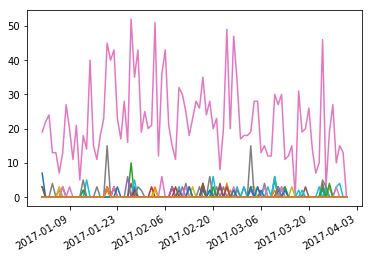

In [73]:
# plot di tutte le province
from matplotlib.ticker import MaxNLocator
for ind,row in pro_sin_data.iterrows():
    y = pro_sin_data.loc[ind].values
    plt.gca().plot_date(x, y, '-')
    plt.gcf().autofmt_xdate()
    #plt.gca().set_xlim([datetime.date(2017, 1, 1), datetime.date(2017, 3, 31)])
    #plt.gca().set_ylim([0, 7])
    #plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

set(['tavernelle', 'gabicce mare', 'fossombrone', 'fano', 'giardino della galla', 'zona industriale bellocchi', 'marotta', 'urbino', 'pesaro'])


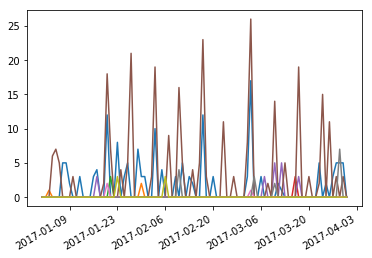

In [82]:
# plot dei comuni entro la stessa provincia
nome_prov = 'Pesaro e Urbino'

single_prov= ita[ita['provincia'] == nome_prov]
print set(single_prov['arr_city_name'])

# Define a dictionary with the functions to apply for a given column:
f = {'fullseats': 'sum', 'seatsleft': 'sum', 'distance':'mean','arr_lat':'mean',
     'arr_long':'mean','recommended_price':'mean'}

single_prov = single_prov.groupby(['arr_city_name','dep_day']).agg(f)

index = sorted(set(single_prov.index.get_level_values('arr_city_name')))
cols = pd.date_range(start = datetime.date(2017, 1, 1), end = datetime.date(2017, 3, 31), freq='D')

pro_sin_data = pd.DataFrame(index=index, columns=cols)
pro_sin_data = pro_sin_data.fillna(0) # with 0s rather than NaNs

for ind, row in single_prov.iterrows():
    com = row.name[0]
    dat = row.name[1]
    
    value = int(row['seatsleft'] + row['fullseats'])
    
    pro_sin_data.set_value(pro_sin_data.index == com, dat, value)
        
cols = pro_sin_data.columns.tolist()
x = pd.to_datetime(cols)

# plot di tutte le province
from matplotlib.ticker import MaxNLocator
for ind,row in pro_sin_data.iterrows():
    y = pro_sin_data.loc[ind].values
    plt.gca().plot_date(x, y, '-')
    plt.gcf().autofmt_xdate()
    #plt.gca().set_xlim([datetime.date(2017, 1, 1), datetime.date(2017, 3, 31)])
    #plt.gca().set_ylim([0, 7])
    #plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()


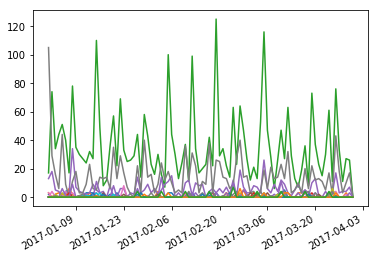

In [85]:
# plot stati esteri
est = df[df['country_code'] != 'IT']

# Define a dictionary with the functions to apply for a given column:
f = {'fullseats': 'sum', 'seatsleft': 'sum', 'distance':'mean','arr_lat':'mean',
     'arr_long':'mean','recommended_price':'mean'}

single_st = est.groupby(['country_code','dep_day']).agg(f)

index = sorted(set(single_st.index.get_level_values('country_code')))
cols = pd.date_range(start = datetime.date(2017, 1, 1), end = datetime.date(2017, 3, 31), freq='D')

est_data = pd.DataFrame(index=index, columns=cols)
est_data = est_data.fillna(0) # with 0s rather than NaNs

for ind, row in single_st.iterrows():
    com = row.name[0]
    dat = row.name[1]
    
    value = int(row['seatsleft'] + row['fullseats'])
    
    est_data.set_value(est_data.index == com, dat, value)
        
cols = est_data.columns.tolist()
x = pd.to_datetime(cols)

# plot di tutte le province
from matplotlib.ticker import MaxNLocator
for ind,row in est_data.iterrows():
    y = est_data.loc[ind].values
    plt.gca().plot_date(x, y, '-')
    plt.gcf().autofmt_xdate()
    #plt.gca().set_xlim([datetime.date(2017, 1, 1), datetime.date(2017, 3, 31)])
    #plt.gca().set_ylim([0, 7])
    #plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()


In [86]:
est_data

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-03-22 00:00:00,2017-03-23 00:00:00,2017-03-24 00:00:00,2017-03-25 00:00:00,2017-03-26 00:00:00,2017-03-27 00:00:00,2017-03-28 00:00:00,2017-03-29 00:00:00,2017-03-30 00:00:00,2017-03-31 00:00:00
AT,2,0,0,0,0,4,5,0,0,0,...,0,0,2,0,0,0,0,0,0,0
BE,3,0,2,3,2,0,6,2,0,0,...,0,0,0,0,0,0,0,3,0,0
CH,17,74,34,44,51,40,17,78,35,30,...,15,30,61,11,76,33,11,27,26,0
CZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DE,13,18,5,4,0,3,3,34,7,4,...,0,4,0,3,17,3,4,4,7,0
DK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ES,3,0,0,0,0,4,2,3,0,0,...,0,0,0,3,4,0,0,2,0,0
FR,105,29,16,6,44,9,0,11,18,3,...,11,5,17,2,43,18,3,10,17,0
GB,0,0,2,0,3,0,0,0,0,0,...,0,0,0,6,0,0,0,0,0,0
HR,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
